In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [2]:
df=pd.read_excel("/content/global_superstore.xlsx")

In [3]:
# Print the list of columns
print(df.columns)

# Display the first few rows of the DataFrame
df.head()

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Postal Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.77,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


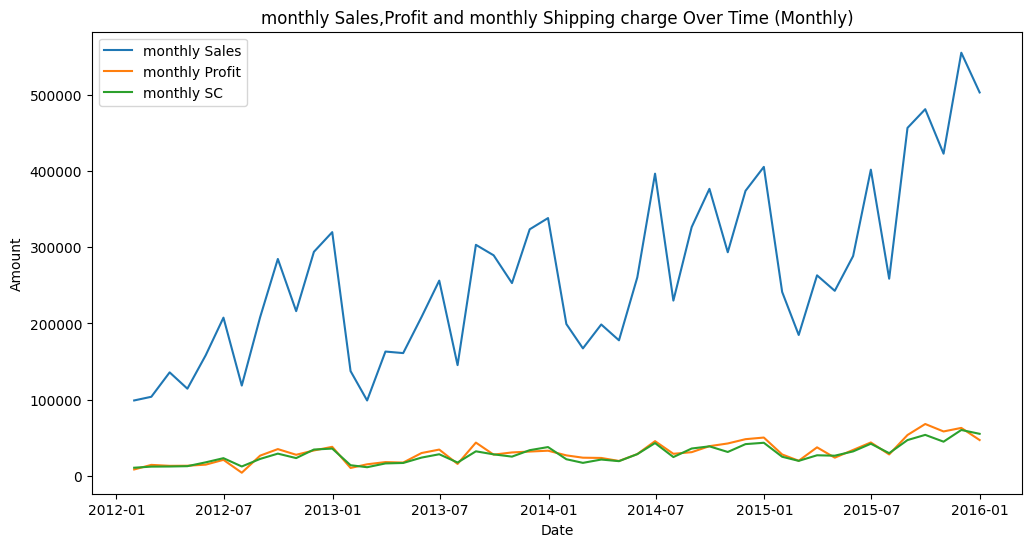

In [4]:
# Monthly aggregation
monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()
monthly_profit = df.resample('M', on='Order Date')['Profit'].sum()
monthly_SC = df.resample('M', on='Order Date')['Shipping Cost'].sum()
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='monthly Sales')
plt.plot(monthly_profit, label='monthly Profit')
plt.plot(monthly_SC, label='monthly SC')
plt.title('monthly Sales,Profit and monthly Shipping charge Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()


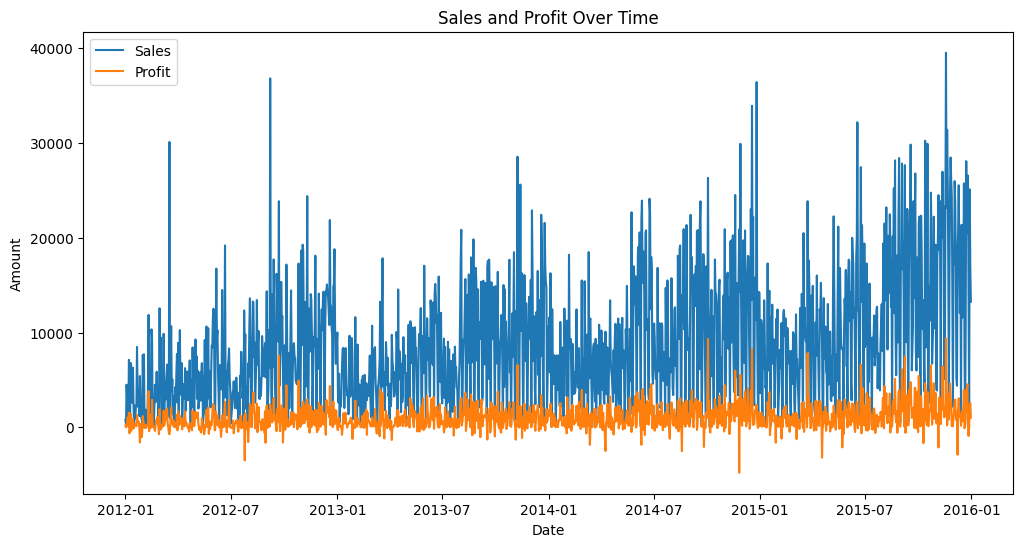

In [5]:
# Time series analysis
sales_by_date = df.groupby('Order Date')['Sales'].sum()
profit_by_date = df.groupby('Order Date')['Profit'].sum()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(sales_by_date, label='Sales')
plt.plot(profit_by_date, label='Profit')
plt.title('Sales and Profit Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()


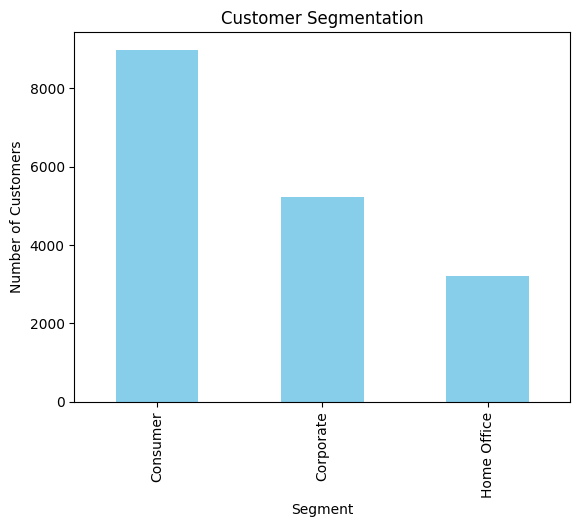

In [6]:
# Customer segmentation
customer_segments = df.groupby('Segment')['Customer ID'].nunique()

# Plotting
customer_segments.plot(kind='bar', color='skyblue')
plt.title('Customer Segmentation')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.show()


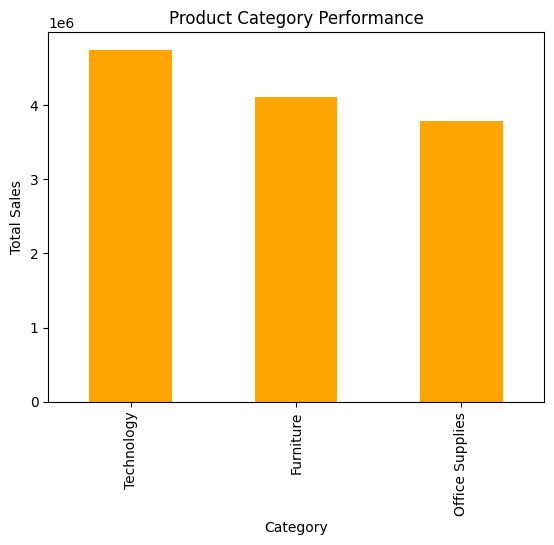

Category
Furniture          4.110452e+06
Office Supplies    3.787493e+06
Technology         4.744557e+06
Name: Sales, dtype: float64

In [7]:
# Product category performance
category_performance = df.groupby('Category')['Sales'].sum()

# Plotting
category_performance.sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('Product Category Performance')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()
category_performance

Category analysis=Their are 3 category so far(Technology,furniture,office supplies.***The maximum number of sales come from Technology followed by furniture and office supplies***

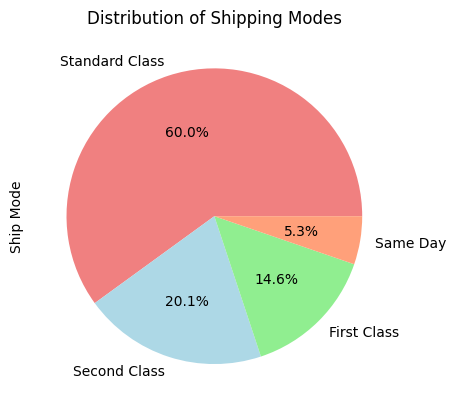

In [8]:
# Shipping analysis
shipping_modes = df['Ship Mode'].value_counts()

# Plotting
shipping_modes.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightblue', 'lightgreen', 'lightsalmon'])
plt.title('Distribution of Shipping Modes')
plt.show()


Distribution analysis:Their are 4 categories of distribution
maximum distribution is done by the Standard Class followed by second class,Second Class,First Class,Same Day

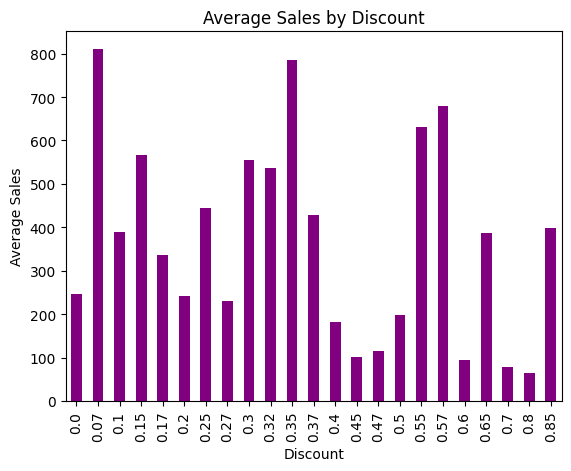

In [9]:
# Discount impact
df["Discount"]=df["Discount"].round(2)# for removing extra decimal places.
discount_impact = df.groupby('Discount')['Sales'].mean()
# Plotting
discount_impact.plot(kind='bar', color='purple')
plt.title('Average Sales by Discount')
plt.xlabel('Discount')
plt.ylabel('Average Sales')
plt.show()


Discount imapact:According to the analysis we can clearly say that discount is not directly proportional to the sales.
above in the graph we can see that maximum discount does not means maximum sales.

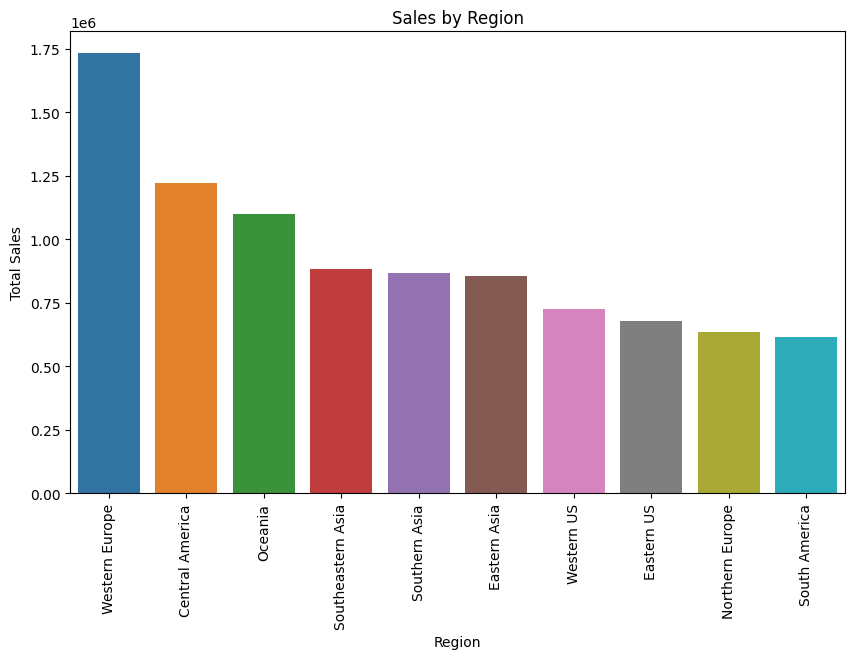

In [10]:
# Geographic analysis
sales_by_region = df.groupby(['Region'])['Sales'].sum().reset_index().sort_values(by="Sales",ascending=False).head(10)
# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x="Region",y="Sales",data=sales_by_region)
# sales_by_region.sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation='vertical')
plt.show()


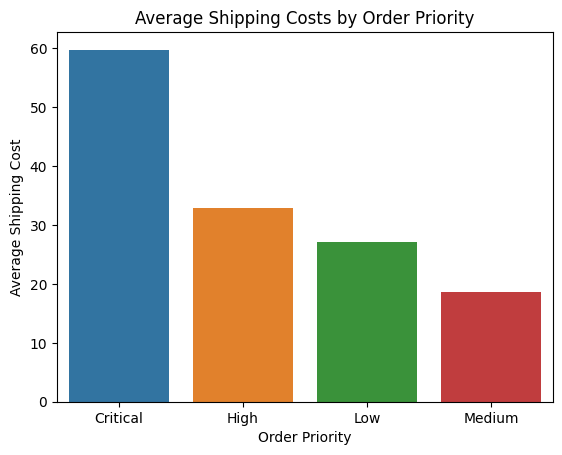

In [11]:
# Order priority and shipping costs
shipping_costs_by_priority = df.groupby('Order Priority')['Shipping Cost'].mean().sort_values(ascending=False)

# Plotting
sns.barplot(x=shipping_costs_by_priority.index , y = shipping_costs_by_priority.values)
plt.title('Average Shipping Costs by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Average Shipping Cost')
plt.show()


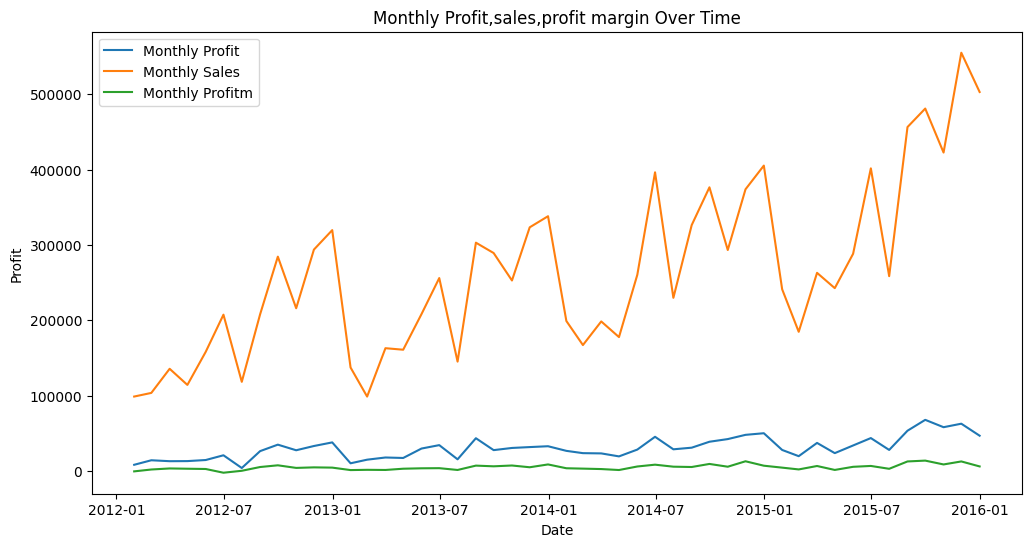

In [19]:
# Time series analysis for profit
df["Profit Margin"]=(df['Profit']/df['Sales'])*100

profit_by_date = df.groupby('Order Date')['Profit'].sum()
sales_by_date =df.groupby('Order Date')['Sales'].sum()
profitm_by_date =df.groupby('Order Date')['Profit Margin'].sum()
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(profit_by_date.resample('M').sum(), label='Monthly Profit')
plt.plot(sales_by_date.resample('M').sum(), label='Monthly Sales')
plt.plot(profitm_by_date.resample('M').sum(), label='Monthly Profitm')
plt.title('Monthly Profit,sales,profit margin Over Time')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.legend()
plt.show()


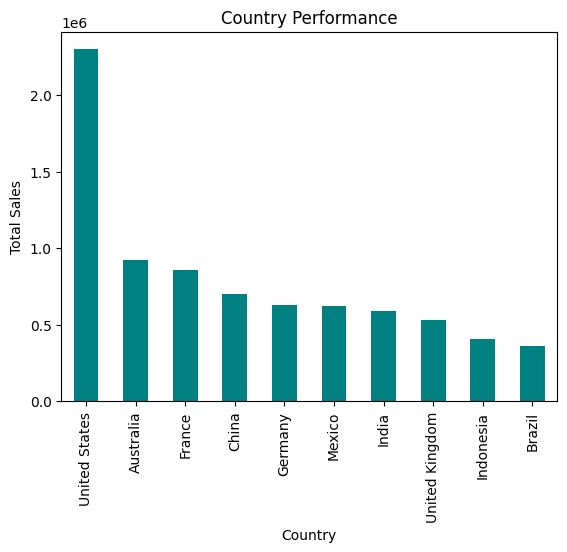

In [14]:
# Market analysis
Country_performance = df.groupby('Country')['Sales'].sum().sort_values(ascending=False).head(10)
#Plotting
Country_performance.plot(kind='bar', color='teal')
plt.title('Country Performance')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()

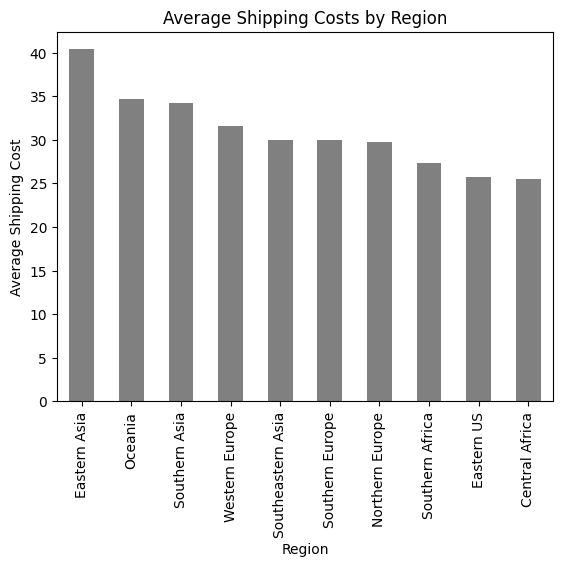

In [15]:
# Cost analysis
shipping_costs_by_region = df.groupby('Region')['Shipping Cost'].mean().sort_values(ascending=False).head(10)


# Plotting
shipping_costs_by_region.sort_values(ascending=False).plot(kind='bar', color='gray')
plt.title('Average Shipping Costs by Region')
plt.xlabel('Region')
plt.ylabel('Average Shipping Cost')
plt.show()

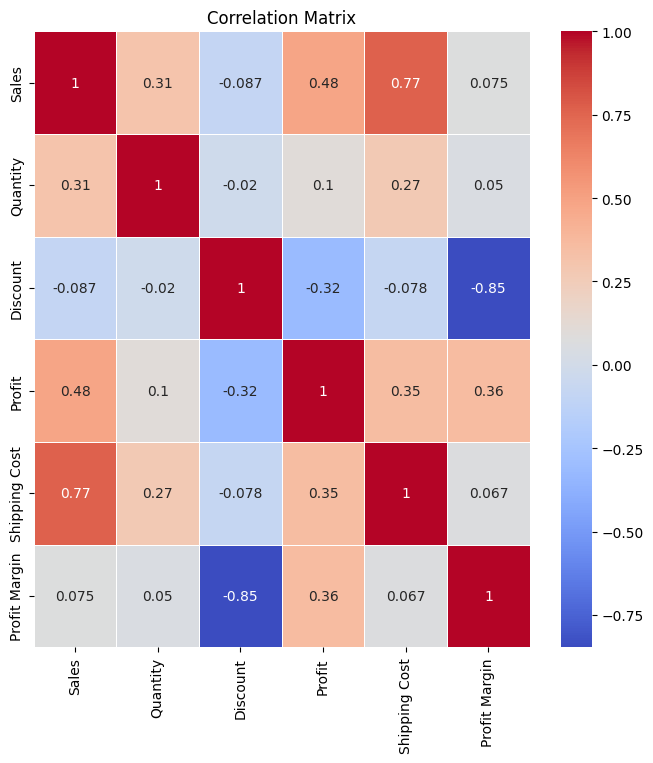

,Sales,Quantity,Discount,Profit,Shipping Cost,Profit Margin
Sales,1.000000,0.313577,-0.086781,0.484918,0.767835,0.074525
Quantity,0.313577,1.000000,-0.019876,0.104365,0.271804,0.050143
Discount,-0.086781,-0.019876,1.000000,-0.316507,-0.078203,-0.847348
Profit,0.484918,0.104365,-0.316507,1.000000,0.354423,0.358106
Shipping Cost,0.767835,0.271804,-0.078203,0.354423,1.000000,0.066858
Profit Margin,0.074525,0.050143,-0.847348,0.358106,0.066858,1.000000


In [18]:
numerical_columns = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numerical columns
coloumn_selected=['Sales','Quantity','Discount','Profit','Shipping Cost','Profit Margin']
correlation_matrix = df[coloumn_selected].corr()


# Display the correlation matrix for specific columns

plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()
correlation_matrix